In [1]:
install.packages("leaps")


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpEqNZLh/downloaded_packages


In [2]:
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpEqNZLh/downloaded_packages


In [3]:
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpEqNZLh/downloaded_packages


In [4]:
install.packages("dplyr")


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpEqNZLh/downloaded_packages


In [5]:
install.packages("skimr")


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpEqNZLh/downloaded_packages


In [6]:
install.packages("corrplot")


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpEqNZLh/downloaded_packages


In [7]:
install.packages("car")


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpEqNZLh/downloaded_packages


In [8]:
library(tidyverse)
library(dplyr)
library(corrplot)
library(psych)
library(skimr)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [9]:
Cancer_df <- read.csv("cancer.csv")

In [10]:
head(Cancer_df)

,County,Population,deathRate,incidenceRate,medIncome,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,⋯,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Iosco County, Michigan",25345,193.4,406.2,37122,19.0,624.0,51.6,52.5,2.20,⋯,10.0,12.1,61.4,29.4,53.2,23.4,96.14582,0.62595961,0.5196646,0.1417267
2,"Mineral County, Montana",4251,188.8,538.8,36449,17.3,619.2,52.3,50.7,2.67,⋯,9.8,11.8,48.3,20.2,53.8,27.1,98.44266,0.07078811,0.1651723,0.1415762
3,"Lake County, Oregon",7829,139.2,397.2,40328,19.3,579.6,48.2,48.5,2.08,⋯,12.1,10.6,54.7,29.9,48.3,25.6,90.28309,0.61208875,0.8161183,2.3845958
4,"Pittsylvania County, Virginia",62194,176.8,399.0,44207,14.6,546.0,44.2,46.7,2.36,⋯,9.4,7.7,66.2,42.6,36.2,18.6,74.84473,21.41765137,0.3423894,1.5765837
5,"Hall County, Texas",3138,223.2,415.8,33324,24.5,536.4,42.8,45.2,2.71,⋯,8.9,11.5,42.6,20.4,42.7,26.9,81.67343,7.46175461,0.3122073,6.2441461
6,"Lane County, Kansas",1670,148.6,371.5,53739,10.9,535.2,44.7,44.4,2.07,⋯,15.5,2.4,78.2,48.6,29.2,11.2,98.32736,0.35842294,0.0000000,0.0000000


In [11]:
#Fig 2 and 3 in the report
summary(Cancer_df)

    County            Population         deathRate     incidenceRate   
 Length:3047        Min.   :     827   Min.   : 59.7   Min.   : 201.3  
 Class :character   1st Qu.:   11684   1st Qu.:161.2   1st Qu.: 413.1  
 Mode  :character   Median :   26643   Median :178.1   Median : 449.5  
                    Mean   :  102637   Mean   :178.7   Mean   : 445.7  
                    3rd Qu.:   68671   3rd Qu.:195.2   3rd Qu.: 482.1  
                    Max.   :10170292   Max.   :362.8   Max.   :1206.9  
   medIncome      povertyPercent    MedianAge      MedianAgeMale  
 Min.   : 22640   Min.   : 3.20   Min.   : 22.30   Min.   :22.40  
 1st Qu.: 38882   1st Qu.:12.15   1st Qu.: 37.70   1st Qu.:36.35  
 Median : 45207   Median :15.90   Median : 41.00   Median :39.60  
 Mean   : 47063   Mean   :16.88   Mean   : 45.27   Mean   :39.57  
 3rd Qu.: 52492   3rd Qu.:20.40   3rd Qu.: 44.00   3rd Qu.:42.50  
 Max.   :125635   Max.   :47.40   Max.   :624.00   Max.   :64.70  
 MedianAgeFemale AvgHouseho

In [12]:
# Fig 1 in the report
str(Cancer_df)

'data.frame':	3047 obs. of  25 variables:
 $ County                : chr  "Iosco County, Michigan" "Mineral County, Montana" "Lake County, Oregon" "Pittsylvania County, Virginia" ...
 $ Population            : int  25345 4251 7829 62194 3138 1670 93246 3910 126517 127253 ...
 $ deathRate             : num  193 189 139 177 223 ...
 $ incidenceRate         : num  406 539 397 399 416 ...
 $ medIncome             : int  37122 36449 40328 44207 33324 53739 40429 37581 70705 47175 ...
 $ povertyPercent        : num  19 17.3 19.3 14.6 24.5 10.9 15.9 19.4 10.4 14.7 ...
 $ MedianAge             : num  624 619 580 546 536 ...
 $ MedianAgeMale         : num  51.6 52.3 48.2 44.2 42.8 44.7 41.6 42.4 42 41 ...
 $ MedianAgeFemale       : num  52.5 50.7 48.5 46.7 45.2 44.4 46.2 45.4 44.5 43.9 ...
 $ AvgHouseholdSize      : num  2.2 2.67 2.08 2.36 2.71 2.07 2.27 2.34 2.42 2.51 ...
 $ PctMarriedHouseholds  : num  48.1 46.8 47.6 51.6 51.5 ...
 $ PctNoHS18_24          : num  25.2 17 7.7 14.7 27.4 25.2 22 

In [13]:
Cancer_df$County <- NULL

In [14]:
head(Cancer_df)

,Population,deathRate,incidenceRate,medIncome,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PctMarriedHouseholds,⋯,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25345,193.4,406.2,37122,19.0,624.0,51.6,52.5,2.20,48.10897,⋯,10.0,12.1,61.4,29.4,53.2,23.4,96.14582,0.62595961,0.5196646,0.1417267
2,4251,188.8,538.8,36449,17.3,619.2,52.3,50.7,2.67,46.76903,⋯,9.8,11.8,48.3,20.2,53.8,27.1,98.44266,0.07078811,0.1651723,0.1415762
3,7829,139.2,397.2,40328,19.3,579.6,48.2,48.5,2.08,47.56098,⋯,12.1,10.6,54.7,29.9,48.3,25.6,90.28309,0.61208875,0.8161183,2.3845958
4,62194,176.8,399.0,44207,14.6,546.0,44.2,46.7,2.36,51.59136,⋯,9.4,7.7,66.2,42.6,36.2,18.6,74.84473,21.41765137,0.3423894,1.5765837
5,3138,223.2,415.8,33324,24.5,536.4,42.8,45.2,2.71,51.51515,⋯,8.9,11.5,42.6,20.4,42.7,26.9,81.67343,7.46175461,0.3122073,6.2441461
6,1670,148.6,371.5,53739,10.9,535.2,44.7,44.4,2.07,47.82609,⋯,15.5,2.4,78.2,48.6,29.2,11.2,98.32736,0.35842294,0.0000000,0.0000000


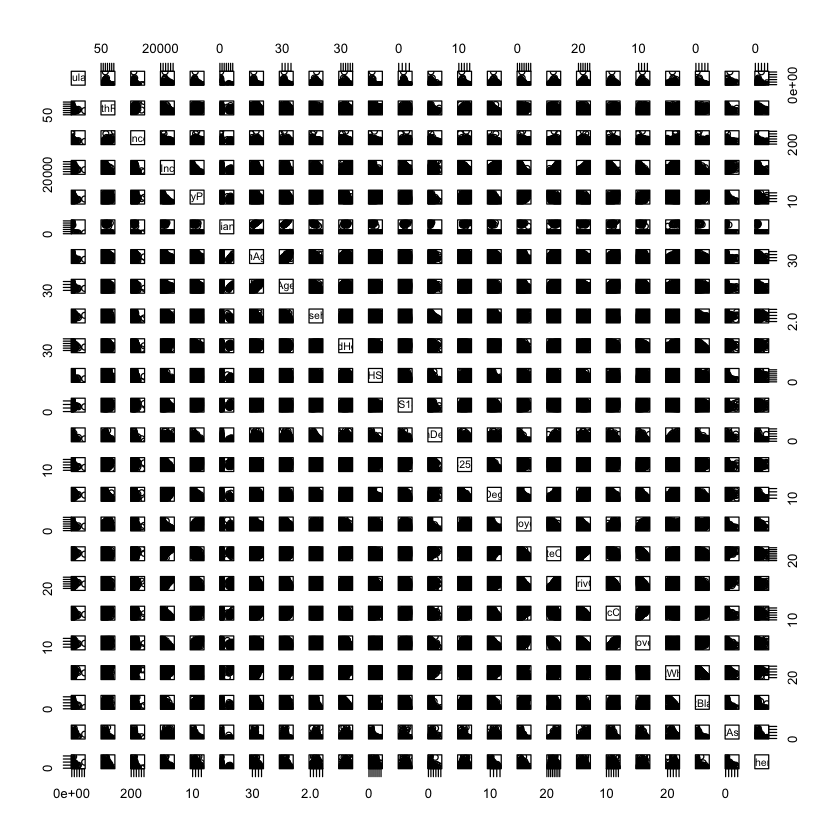

In [15]:
plot(Cancer_df)

In [16]:
cor(Cancer_df)

,Population,deathRate,incidenceRate,medIncome,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PctMarriedHouseholds,⋯,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace
Population,1.00000000,-0.120073096,0.031547584,0.23552286,-0.06529915,-0.025218994,-0.176607643,-0.17793232,0.16456988,-0.1279794627,⋯,0.29746337,0.05076814,0.052676513,0.15864952,-0.16006562,-0.041468807,-0.19009450,0.07304407,0.464167791,0.241468004
deathRate,-0.12007310,1.000000000,0.512293430,-0.42861493,0.42938898,0.004375077,-0.021929429,0.01204839,-0.03739590,-0.2933253405,⋯,-0.48547732,0.37841244,-0.386065507,-0.26739943,0.40457166,0.449357576,-0.17739998,0.25702356,-0.186331105,-0.189893571
incidenceRate,0.03154758,0.512293430,1.000000000,-0.03610901,0.05365298,0.015993612,-0.019216070,-0.01376714,-0.11758028,-0.1810920547,⋯,-0.06758925,0.14853876,0.044675306,0.10289207,0.07800007,0.082780310,-0.04354536,0.13255403,-0.006670791,-0.192230325
medIncome,0.23552286,-0.428614927,-0.036109008,1.00000000,-0.78896524,-0.013287743,-0.091662642,-0.15327840,0.15110771,0.4460828953,⋯,0.70492824,-0.45310766,0.724174768,0.74729355,-0.75482175,-0.719756152,0.16722544,-0.27023162,0.425844240,0.083634870
povertyPercent,-0.06529915,0.429388980,0.053652979,-0.78896524,1.00000000,-0.029279996,-0.214001049,-0.14816354,0.14387453,-0.6049527844,⋯,-0.53159969,0.65514812,-0.822534292,-0.68309966,0.65116206,0.798642030,-0.50943281,0.51152966,-0.157288704,0.047095893
MedianAge,-0.02521899,0.004375077,0.015993612,-0.01328774,-0.02928000,1.000000000,0.129119478,0.12467837,-0.07435110,0.0145036093,⋯,-0.02035219,0.01859044,0.004665111,-0.03692646,0.04906021,-0.003297872,0.03500937,-0.01717324,-0.038423911,-0.030276508
MedianAgeMale,-0.17660764,-0.021929429,-0.019216070,-0.09166264,-0.21400105,0.129119478,1.000000000,0.93369610,-0.58512893,0.2222777445,⋯,-0.13159935,-0.14273747,0.082231778,-0.20866397,0.39896723,0.002478719,0.39804436,-0.24274813,-0.238322374,-0.266655447
MedianAgeFemale,-0.17793232,0.012048386,-0.013767136,-0.15327840,-0.14816354,0.124678372,0.933696103,1.00000000,-0.63136002,0.1615068308,⋯,-0.18084533,-0.11116131,0.046909158,-0.25222114,0.45549646,0.047659145,0.33980391,-0.15672844,-0.258747912,-0.274119578
AvgHouseholdSize,0.16456988,-0.037395896,-0.117580278,0.15110771,0.14387453,-0.074351104,-0.585128932,-0.63136002,1.00000000,0.1335613372,⋯,-0.04436967,0.26550927,-0.280268616,0.01167679,-0.20790820,0.131339989,-0.34676358,0.10367868,0.206832628,0.359205758
PctMarriedHouseholds,-0.12797946,-0.293325341,-0.181092055,0.44608290,-0.60495278,0.014503609,0.222277744,0.16150683,0.13356134,1.0000000000,⋯,0.09813386,-0.46960901,0.434640055,0.32256933,-0.36217051,-0.473993882,0.59677107,-0.57359245,-0.086602036,-0.027352296


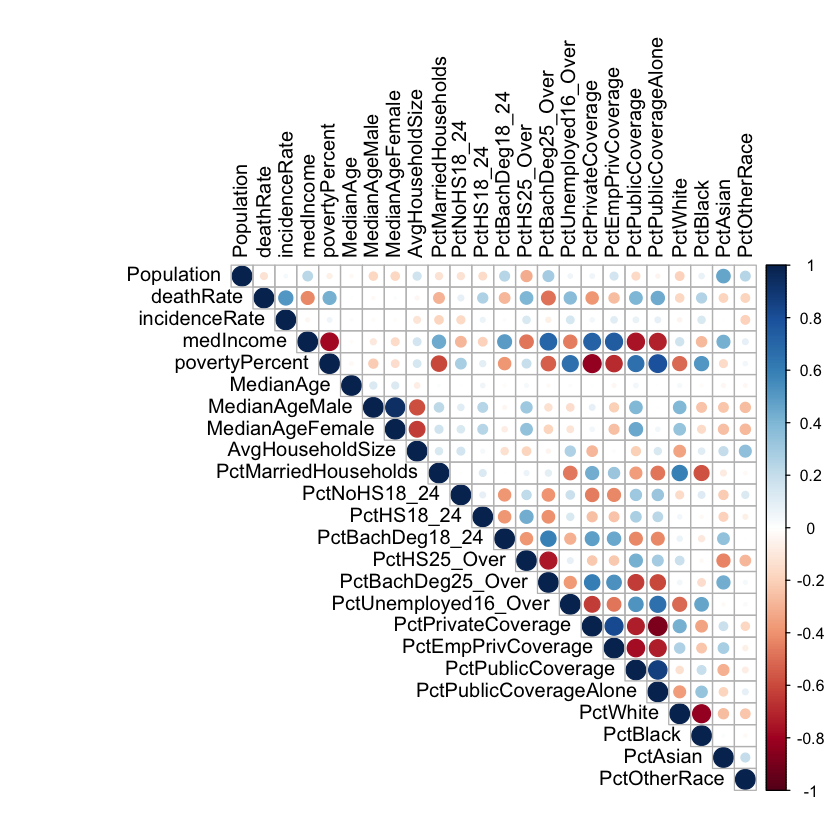

In [17]:
# Fig 4 in the report
corr_mat <- cor(Cancer_df) 
corrplot(corr_mat, method = "circle", type = "upper", tl.col = "black")

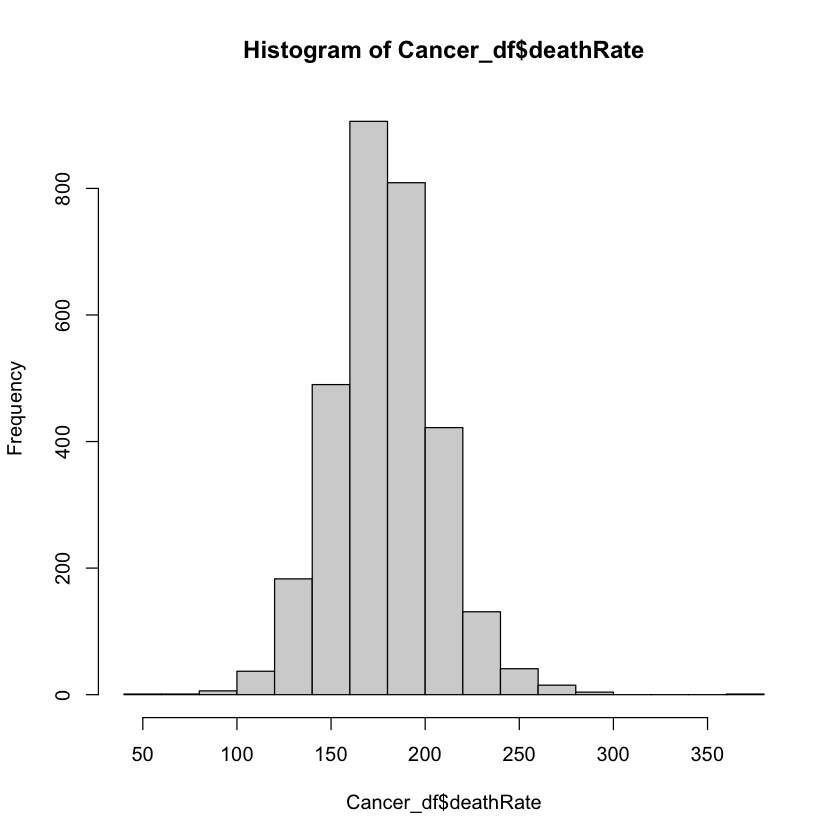

In [18]:
hist(Cancer_df$deathRate)

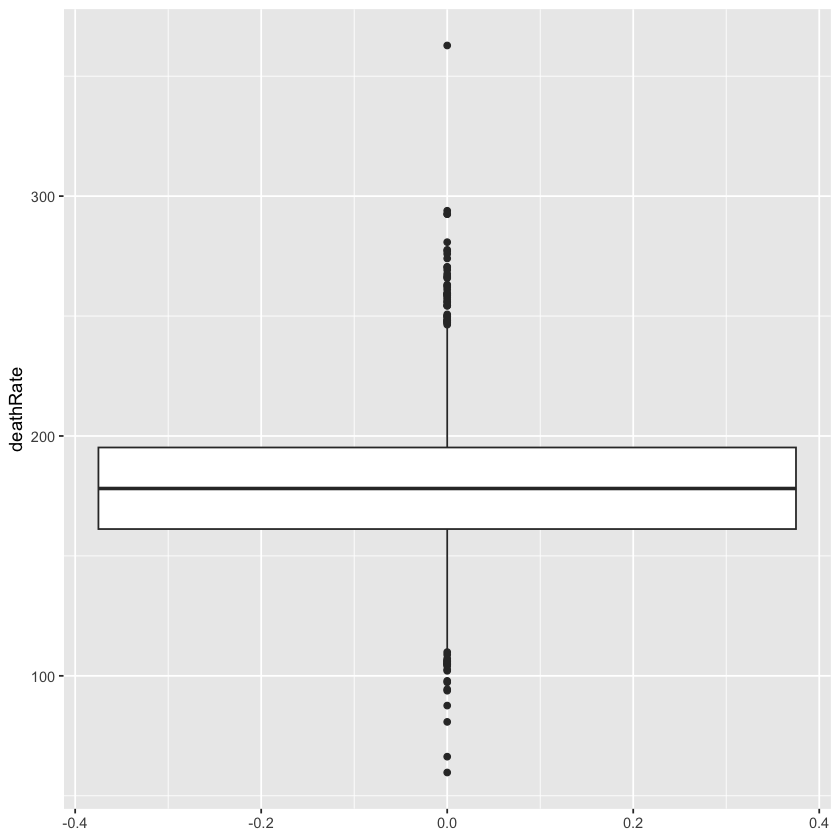

In [19]:
# Fig 5 in the report
# checking for outliers
ggplot(Cancer_df, aes(y= deathRate)) + geom_boxplot()

In [20]:
# Calculating the upper limits of potential outliers
upper_limit <- quantile(Cancer_df$deathRate, 0.75) + 1.5 * IQR(Cancer_df$deathRate)
print(upper_limit)

  75% 
246.2 


In [21]:
# Calculating the lower limits of potential outliers
lower_limit <- quantile(Cancer_df$deathRate, 0.25) - 1.5 * IQR(Cancer_df$deathRate)
print(lower_limit)

  25% 
110.2 


In [22]:
# Subseting the "deathRate" variable to exclude potential outliers
potential_outliers <- Cancer_df$deathRate[Cancer_df$deathRate < lower_limit | Cancer_df$deathRate > upper_limit]

In [23]:
# Calculating the median of the potential outliers
median(potential_outliers)

[1] 252.5

In [24]:
# Calculating the minimum and maximum values within 1.5 times the IQR of the lower and upper quartiles
min_val <- max(Cancer_df$deathRate[Cancer_df$deathRate <= quantile(Cancer_df$deathRate, 0.25) + 1.5 * IQR(Cancer_df$deathRate)])
max_val <- min(Cancer_df$deathRate[Cancer_df$deathRate >= quantile(Cancer_df$deathRate, 0.75) - 1.5 * IQR(Cancer_df$deathRate)])

# Printing the whisker values
print(c(min_val, max_val))

[1] 212.2 144.3


In [25]:
# Identifying the outliers of the "deathRate" variable
outliers <- Cancer_df$deathRate[Cancer_df$deathRate < lower_limit | Cancer_df$deathRate > upper_limit]

# Printing the outliers
print(outliers)

 [1] 267.6 106.1  97.3 108.8  93.8 105.2 250.0 254.3 293.9 104.6 104.8 106.5
[13] 274.0 262.1 259.5 258.7 257.8 109.9 250.0  59.7  94.4 263.1 258.6 254.3
[25] 262.7 275.9 259.5 280.8 248.1 277.1  66.3 107.2 255.8 246.4  97.9 248.2
[37] 247.6 269.2 362.8 247.1 247.3 261.0 105.4 270.5 266.2 265.8 255.9 102.1
[49] 254.5 292.5 270.4 248.7  87.6 292.5 249.7  80.8 106.1 102.6 256.9 266.7
[61] 250.7 277.6 259.1 104.1


In [26]:
# Calculating the lower and upper limits of potential outliers
Q1 <- quantile(Cancer_df$deathRate, 0.25)
Q3 <- quantile(Cancer_df$deathRate, 0.75)
IQR <- Q3 - Q1
lower_limit <- Q1 - 1.5*IQR
upper_limit <- Q3 + 1.5*IQR

# Subset the dataset to exclude outliers
Cancer_df_noOutlier <- Cancer_df[Cancer_df$deathRate >= lower_limit & Cancer_df$deathRate <= upper_limit, ]

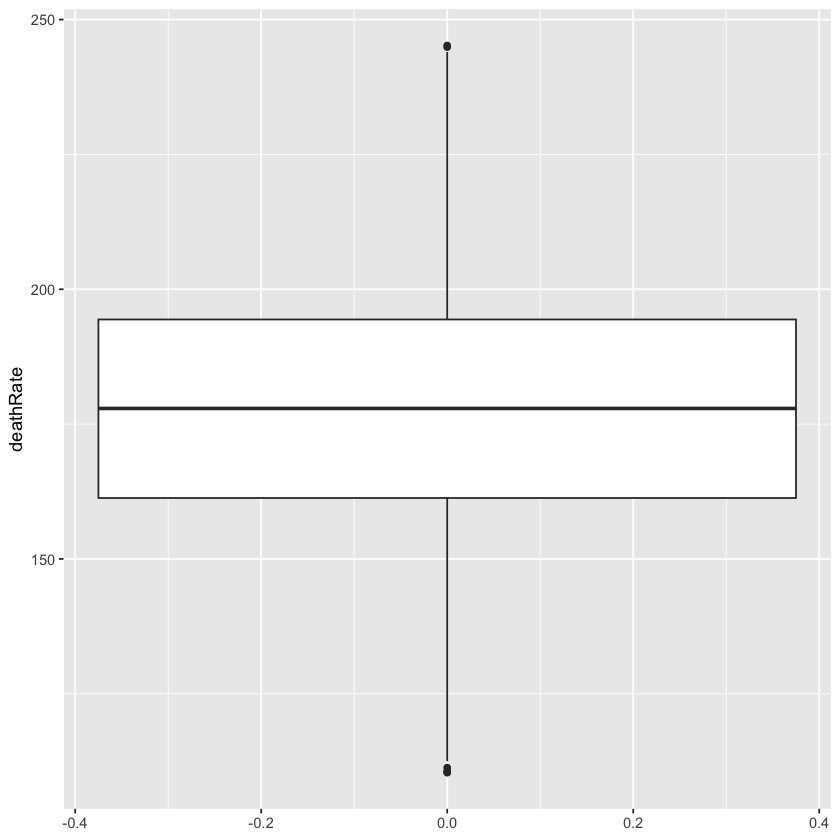

In [27]:
# Fig 6 in the report
# checking for outliers
ggplot(Cancer_df_noOutlier, aes(y= deathRate)) + geom_boxplot()

`geom_smooth()` using formula = 'y ~ x'


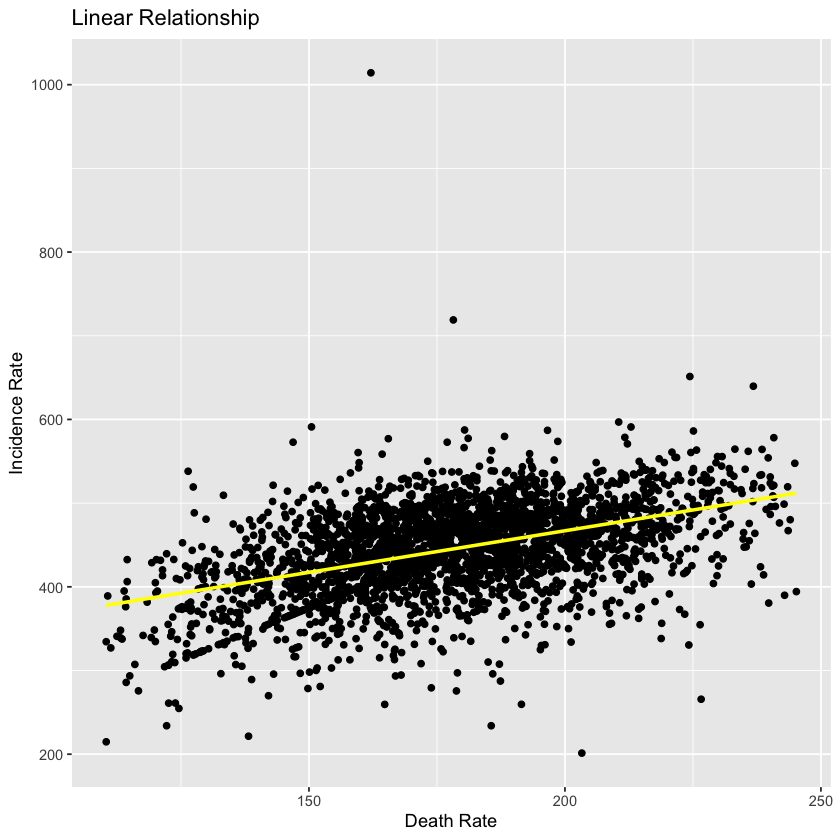

In [28]:
# Fig 7 in the report
ggplot(Cancer_df_noOutlier, aes(x=deathRate, y=incidenceRate) )+ geom_point() +
  ggtitle("Linear Relationship") + 
  xlab("Death Rate") +
  ylab("Incidence Rate") +
  geom_smooth(method = "lm", se = FALSE, col="yellow")

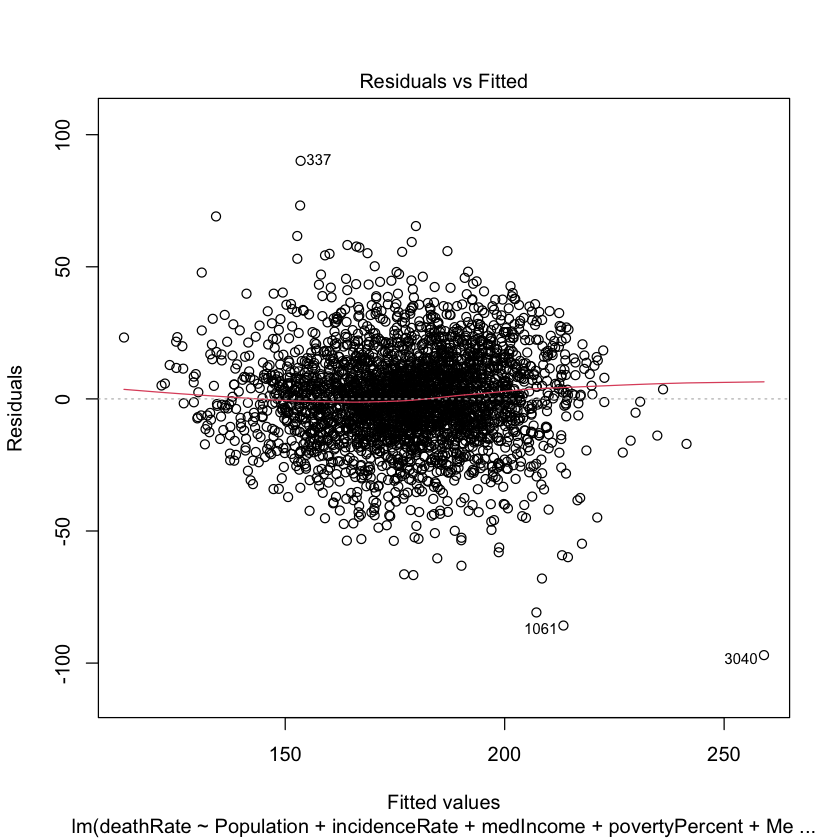

In [29]:
# Fig 8 in the report
model <- lm(deathRate~Population+incidenceRate+medIncome+
                    povertyPercent+MedianAge+
                      MedianAgeMale+MedianAgeFemale+
                      AvgHouseholdSize+PctMarriedHouseholds+
                       PctNoHS18_24+PctHS18_24+PctBachDeg18_24+
                       PctHS25_Over+PctBachDeg25_Over+PctUnemployed16_Over+
                       PctPrivateCoverage+PctEmpPrivCoverage+
                       PctPublicCoverage+PctPublicCoverageAlone+
                       PctWhite+PctBlack+PctAsian+PctOtherRace, data= Cancer_df_noOutlier)
plot(model,1)

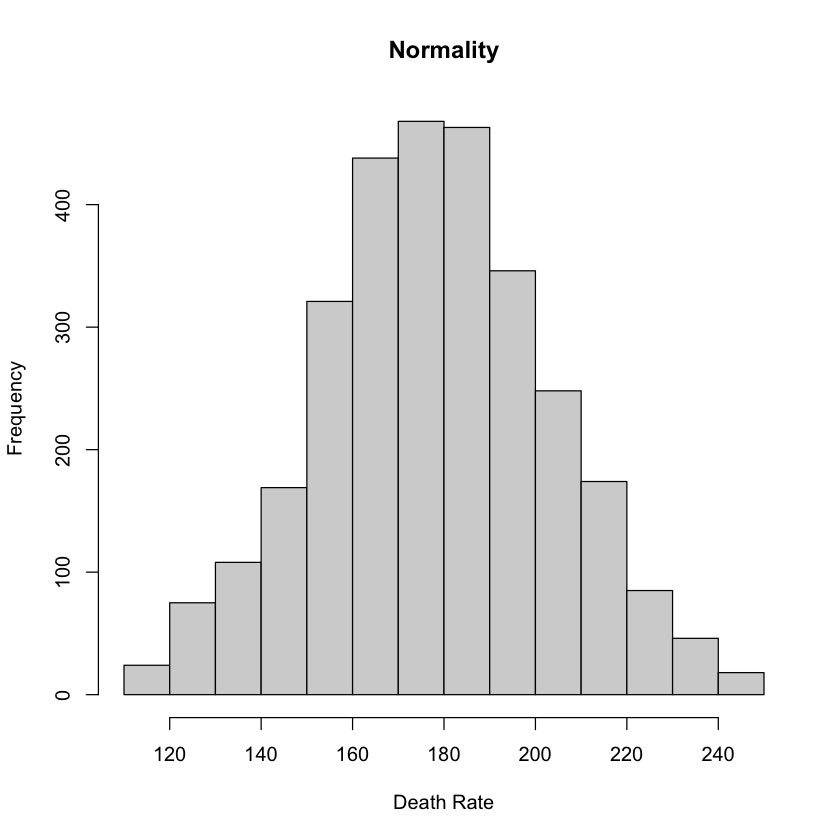

In [30]:
# Fig 9 in the report
hist(Cancer_df_noOutlier$deathRate,
     xlab="Death Rate",
     main=title("Normality"))

In [31]:
# Fig 10 in the report
# creating a linear regression model with no categorical variable
model_nocat <- lm(deathRate~Population+incidenceRate+medIncome+
                    povertyPercent+MedianAge+
                      MedianAgeMale+MedianAgeFemale+
                      AvgHouseholdSize+PctMarriedHouseholds+
                       PctNoHS18_24+PctHS18_24+PctBachDeg18_24+
                       PctHS25_Over+PctBachDeg25_Over+PctUnemployed16_Over+
                       PctPrivateCoverage+PctEmpPrivCoverage+
                       PctPublicCoverage+PctPublicCoverageAlone+
                       PctWhite+PctBlack+PctAsian+PctOtherRace, data= Cancer_df_noOutlier)
# calculating VIF
vif(model_nocat)

Population          incidenceRate              medIncome 
              1.429079               1.222393               7.668633 
        povertyPercent              MedianAge          MedianAgeMale 
              7.445990               1.023488               9.243383 
       MedianAgeFemale       AvgHouseholdSize   PctMarriedHouseholds 
             11.322137               3.900375               3.601768 
          PctNoHS18_24             PctHS18_24        PctBachDeg18_24 
              1.671992               1.603943               1.931944 
          PctHS25_Over      PctBachDeg25_Over   PctUnemployed16_Over 
              3.759082               5.590551               2.478540 
    PctPrivateCoverage     PctEmpPrivCoverage      PctPublicCoverage 
             16.340431               7.481879              23.751692 
PctPublicCoverageAlone               PctWhite               PctBlack 
             22.518646               7.687719               5.462094 
              PctAsian           PctOtherRace 
              1.982732               1.573846

In [32]:
model <- lm(deathRate~Population+incidenceRate+medIncome+
                    povertyPercent+MedianAge+
                      MedianAgeMale+MedianAgeFemale+
                      AvgHouseholdSize+PctMarriedHouseholds+
                       PctNoHS18_24+PctHS18_24+PctBachDeg18_24+
                       PctHS25_Over+PctBachDeg25_Over+PctUnemployed16_Over+
                       PctPrivateCoverage+PctEmpPrivCoverage+
                       PctPublicCoverage+PctPublicCoverageAlone+
                       PctWhite+PctBlack+PctAsian+PctOtherRace, data = Cancer_df_noOutlier)

In [33]:
# Fig 11 in the report
summary(model)


Call:
lm(formula = deathRate ~ Population + incidenceRate + medIncome + 
    povertyPercent + MedianAge + MedianAgeMale + MedianAgeFemale + 
    AvgHouseholdSize + PctMarriedHouseholds + PctNoHS18_24 + 
    PctHS18_24 + PctBachDeg18_24 + PctHS25_Over + PctBachDeg25_Over + 
    PctUnemployed16_Over + PctPrivateCoverage + PctEmpPrivCoverage + 
    PctPublicCoverage + PctPublicCoverageAlone + PctWhite + PctBlack + 
    PctAsian + PctOtherRace, data = Cancer_df_noOutlier)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.983 -10.073  -0.088  10.234  90.090 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.944e+02  1.503e+01  12.939  < 2e-16 ***
Population             -1.658e-06  1.172e-06  -1.415  0.15731    
incidenceRate           1.809e-01  6.658e-03  27.164  < 2e-16 ***
medIncome              -8.157e-05  7.548e-05  -1.081  0.27997    
povertyPercent         -4.602e-02  1.431e-01  -0.322  0.74774    
MedianAge            

In [34]:
final_model <- step(model)

Start:  AIC=17200.52
deathRate ~ Population + incidenceRate + medIncome + povertyPercent + 
    MedianAge + MedianAgeMale + MedianAgeFemale + AvgHouseholdSize + 
    PctMarriedHouseholds + PctNoHS18_24 + PctHS18_24 + PctBachDeg18_24 + 
    PctHS25_Over + PctBachDeg25_Over + PctUnemployed16_Over + 
    PctPrivateCoverage + PctEmpPrivCoverage + PctPublicCoverage + 
    PctPublicCoverageAlone + PctWhite + PctBlack + PctAsian + 
    PctOtherRace

                         Df Sum of Sq     RSS   AIC
- PctPublicCoverageAlone  1         2  937318 17198
- PctBlack                1        11  937327 17199
- PctAsian                1        17  937332 17199
- povertyPercent          1        33  937348 17199
- PctMarriedHouseholds    1        62  937377 17199
- PctPublicCoverage       1        72  937387 17199
- MedianAgeFemale         1       144  937459 17199
- MedianAge               1       263  937579 17199
- PctBachDeg18_24         1       303  937618 17200
- medIncome               1      

In [35]:
# Fig 12 in the report
summary(final_model)


Call:
lm(formula = deathRate ~ incidenceRate + MedianAgeMale + AvgHouseholdSize + 
    PctNoHS18_24 + PctHS18_24 + PctHS25_Over + PctBachDeg25_Over + 
    PctUnemployed16_Over + PctPrivateCoverage + PctEmpPrivCoverage + 
    PctWhite + PctOtherRace, data = Cancer_df_noOutlier)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.466 -10.066  -0.108  10.262  92.740 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          190.125144   9.219227  20.623  < 2e-16 ***
incidenceRate          0.180154   0.006521  27.625  < 2e-16 ***
MedianAgeMale         -0.569312   0.093018  -6.120 1.06e-09 ***
AvgHouseholdSize     -14.276826   1.894071  -7.538 6.32e-14 ***
PctNoHS18_24          -0.083902   0.049165  -1.707    0.088 .  
PctHS18_24             0.199625   0.042875   4.656 3.37e-06 ***
PctHS25_Over           0.419120   0.087643   4.782 1.82e-06 ***
PctBachDeg25_Over     -1.108740   0.130775  -8.478  < 2e-16 ***
PctUnemployed16_Over   0.546662   0.

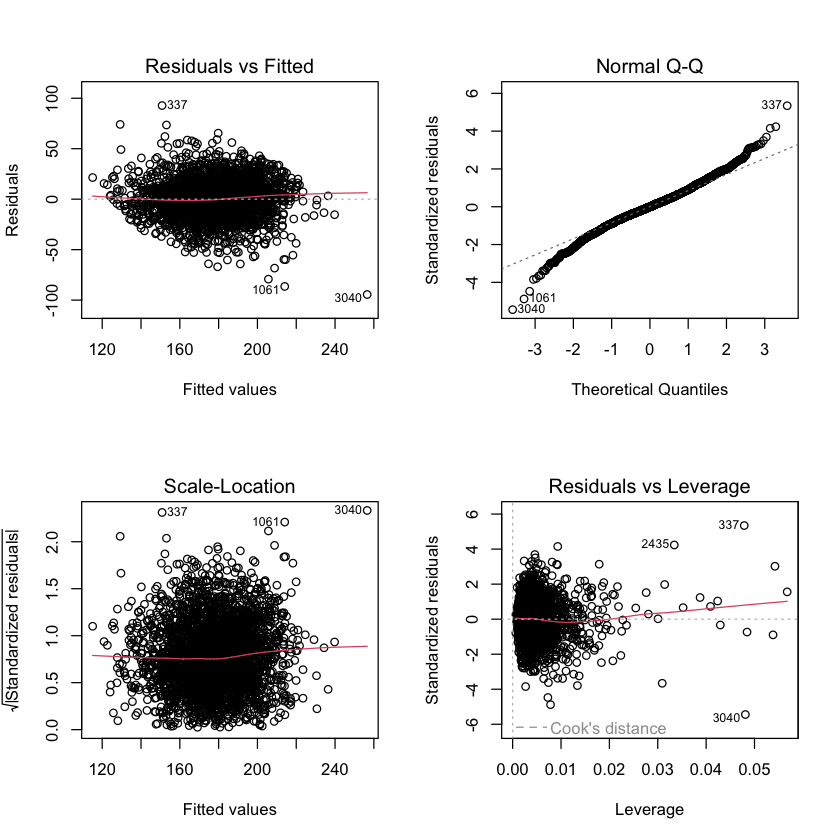

In [36]:
par(mfrow = c(2,2))
plot(final_model)